<a href="https://colab.research.google.com/github/Milltrader/MasteringDeepLearning/blob/main/Torch_Lin_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cu124'

In [ ]:
weight = 0.7
bias = 0.3

X = torch.arange(0,1,0.02).unsqueeze(1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot (train=X_train,
          pred_train = y_train,
          test = X_test,
          pred_test = y_test,
          predictions=None):

    plt.figure(figsize=(10,8))
    plt.scatter(train, pred_train, c='b', s=4, label='Training Data')
def plot (train=X_train,
          pred_train = y_train,
          test = X_test,
          pred_test = y_test,
          predictions=None):

    plt.figure(figsize=(10,8))
    plt.scatter(train, pred_train, c='b', s=4, label='Training Data')
    plt.scatter(test, pred_test, c='g', s=4, label='Testing Data')

    if predictions is not None:
      plt.scatter(test, predictions, c='r', s=4, label='Predictions')

    plt.legend(prop={'size':14})
    plt.show()
    plt.legend(prop={'size':14})
    plt.show()

In [ ]:
class LinearRegression(nn.Module): # Most of the torch tools are located in nn
  def __init__(self):
    super().__init__() # Calling a init method of the nn.Module
    self.weights = nn.Parameter(torch.rand(1, dtype=torch.float),
                                requires_grad=True)
    self.bias = nn.Parameter(torch.rand(1, dtype=torch.float),
                                requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

Almost everything in Pytorch comes from nn.   

nn.Parameters -- weights and biases   
nn. Module -- building blocks (layers)   
torch.optim -- optimization methods   
def forward()    


In [ ]:
torch.manual_seed(52)

model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.7162], requires_grad=True),
 Parameter containing:
 tensor([0.7838], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7162])), ('bias', tensor([0.7838]))])

In [ ]:
# Make prediction with the model
# Because we are using inference, we are not computing the gradients
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
# Same thing
with torch.no_grad():
    y_preds = model_0(X_test)


In [ ]:
print(f"Number of samples in the training set: {len(X_train)}")
print(f"Number of samples in the testing set: {len(X_test)}")
print(f"Predicted values: {y_preds}")

Number of samples in the training set: 40
Number of samples in the testing set: 10
Predicted values: tensor([[1.3568],
        [1.3711],
        [1.3854],
        [1.3998],
        [1.4141],
        [1.4284],
        [1.4427],
        [1.4571],
        [1.4714],
        [1.4857]])


In [ ]:
y_test - y_preds

tensor([[-0.4968],
        [-0.4971],
        [-0.4974],
        [-0.4978],
        [-0.4981],
        [-0.4984],
        [-0.4987],
        [-0.4991],
        [-0.4994],
        [-0.4997]])

In [ ]:
loss_fn = nn.L1Loss() # MAE

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)



### Training Loop



1.   Forward Pass - model(train)
2.   Loss Calculation - loss = loss_fn(y_pred, y_train)
3.   Zero Grads = optimizer.zero_grad()
4.   Backpropagation = loss.backward()
5.   Update Optimizer = optimizer.step()



In [ ]:
torch.manual_seed(52)
epochs = 200

loss_history_train = []
loss_history_test = []
epoch_history =[]

for epoch in range(epochs):

  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()

  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if  epoch % 10 == 0:
        epoch_history.append(epoch)
        loss_history_train.append(loss.detach())
        loss_history_test.append(test_loss.detach())
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")



Epoch: 0 | Loss: 0.4901285767555237 | Test Loss: 0.48478102684020996
Epoch: 10 | Loss: 0.374918669462204 | Test Loss: 0.3500711917877197
Epoch: 20 | Loss: 0.25970882177352905 | Test Loss: 0.21536138653755188
Epoch: 30 | Loss: 0.14449895918369293 | Test Loss: 0.08065153658390045
Epoch: 40 | Loss: 0.03715788200497627 | Test Loss: 0.043384235352277756
Epoch: 50 | Loss: 0.026606405153870583 | Test Loss: 0.05915175750851631
Epoch: 60 | Loss: 0.02311151660978794 | Test Loss: 0.053283363580703735
Epoch: 70 | Loss: 0.0196791123598814 | Test Loss: 0.04501080513000488
Epoch: 80 | Loss: 0.016246333718299866 | Test Loss: 0.03742514178156853
Epoch: 90 | Loss: 0.012814301066100597 | Test Loss: 0.029152613133192062
Epoch: 100 | Loss: 0.009375492110848427 | Test Loss: 0.020880049094557762
Epoch: 110 | Loss: 0.005944402422755957 | Test Loss: 0.013294410891830921
Epoch: 120 | Loss: 0.002510686870664358 | Test Loss: 0.005021864082664251
Epoch: 130 | Loss: 0.006037505809217691 | Test Loss: 0.0041247783228

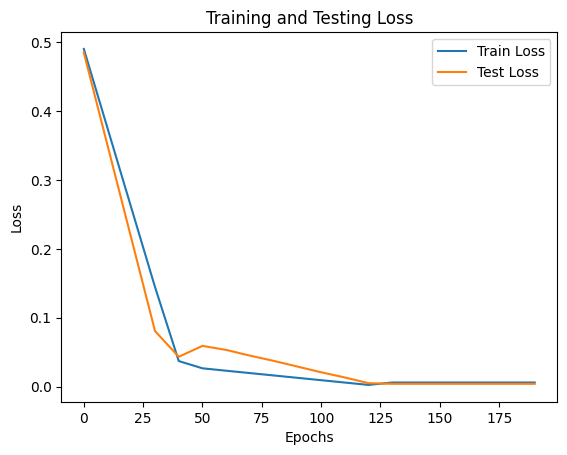

In [ ]:
plt.plot(epoch_history, loss_history_train, label='Train Loss')
plt.plot(epoch_history, loss_history_test, label='Test Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6934])), ('bias', tensor([0.2965]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


### Saving and Loading the Models



*   torch.save
*   torch.load - loads everything
*   torch.nn.Module.load_state_dict -loads params



In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [ ]:
loaded_model_0 = LinearRegression()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_0_preds = loaded_model_0(X_test)

# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_0_preds

<ipython-input-18-6a42a86f4f92>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])